In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Projects\Projects_Data\ML_project\sms_spam_detection\spam.csv',encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop 3 columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# rename columns 

df.rename(columns={'v1' : 'target','v2' : 'text'},inplace=True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing value

df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# dupilcated value

df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.shape

(5169, 2)

# EDA 

In [13]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

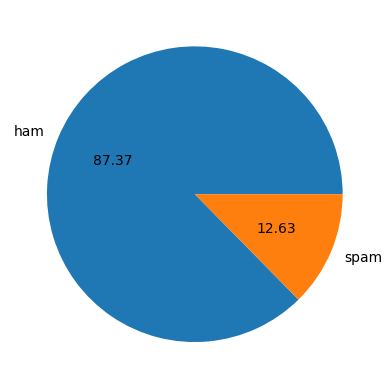

In [15]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [16]:
# data is imbalance

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7100\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [22]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# fetch num of words

In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7100\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7100\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#  ham messages
df[df['target'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# spam messages
df[df['target'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns


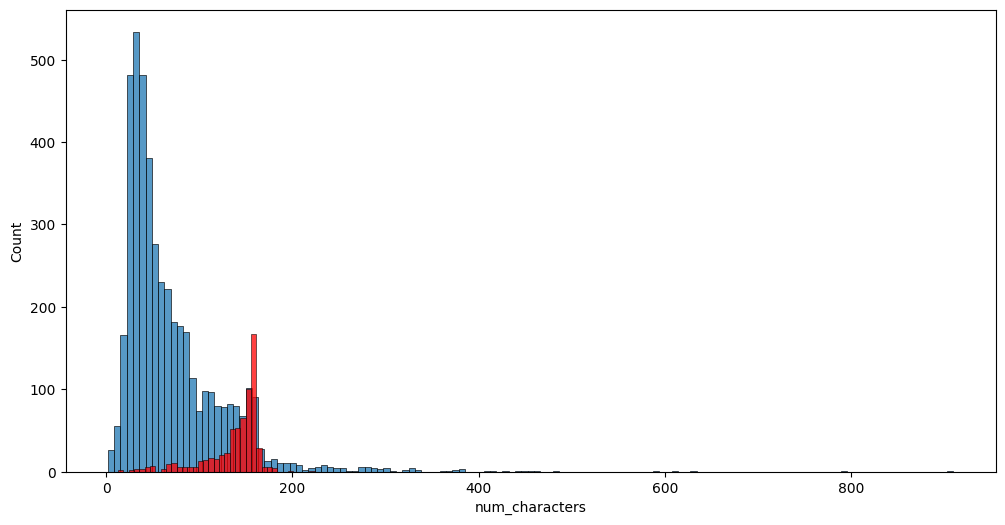

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 'ham']['num_characters'])
sns.histplot(df[df['target'] == 'spam']['num_characters'],color='red')
plt.show()

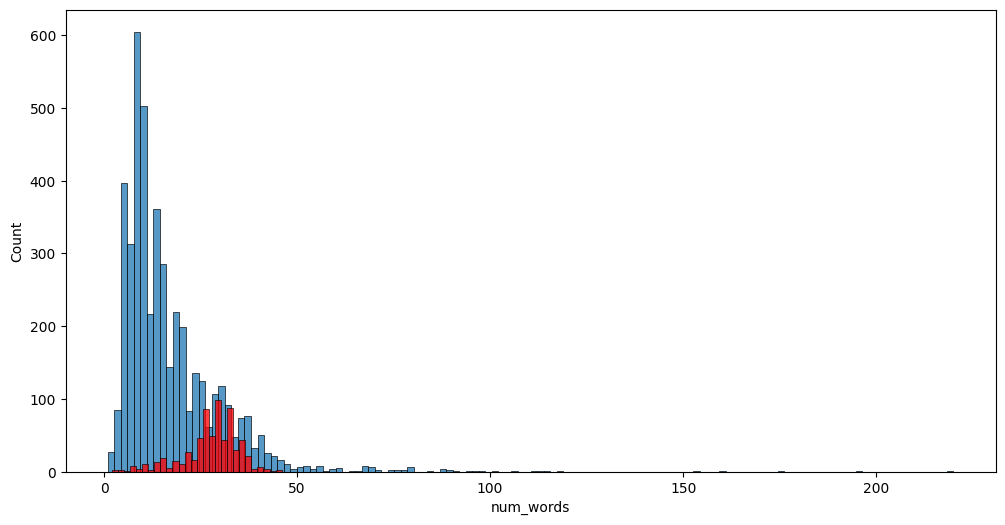

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 'ham']['num_words'])
sns.histplot(df[df['target'] == 'spam']['num_words'],color='red')
plt.show()

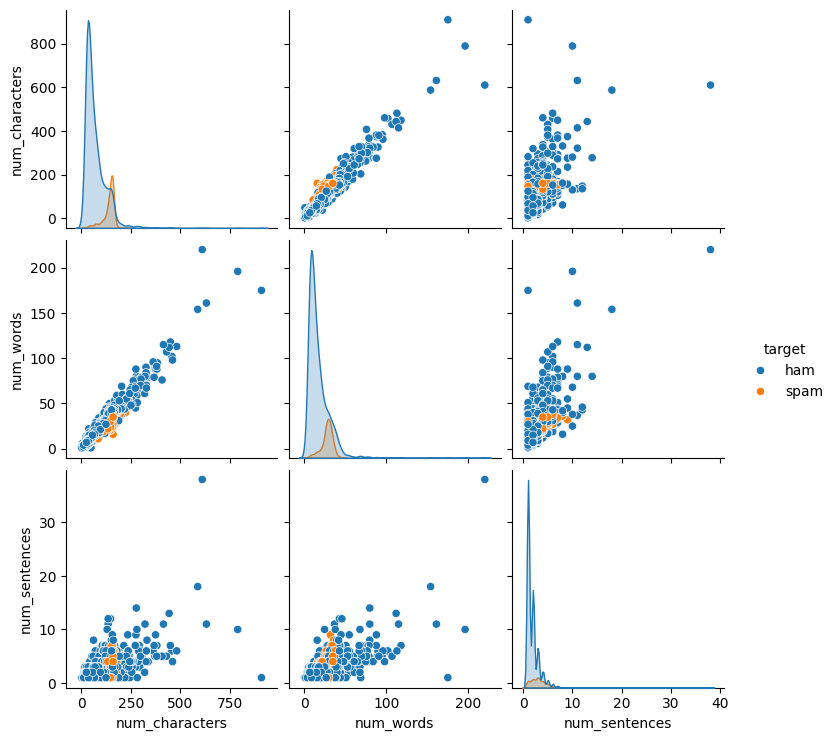

In [34]:
sns.pairplot(df,hue='target')

In [35]:
df.head(1)

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2


In [36]:
mapping = {'ham': 0, 'spam': 1}

In [37]:
df['num_target'] = df['target'].map(mapping)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7100\4206732179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_target'] = df['target'].map(mapping)


In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_target
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0


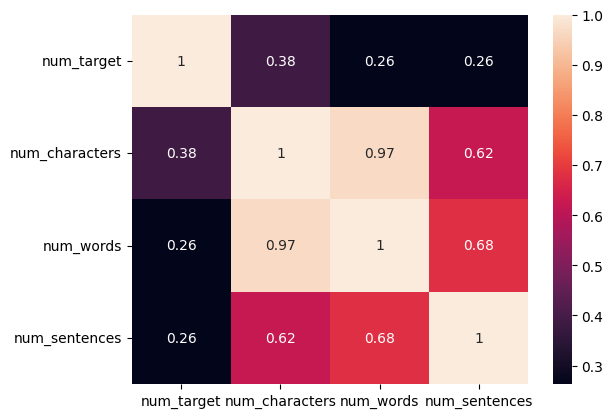

In [39]:
sns.heatmap(df.iloc[:,[5,2,3,4]].corr(),annot=True)
plt.show()

# data preprocessing 
- lower case 
- tokenization
- removing special characters
- removing stop words and punctuation
- stemming

In [40]:
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

In [41]:
import string
string.punctuation                

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
class TextTransformerw(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ps = PorterStemmer()
        nltk.download('punkt')
        nltk.download('stopwords')
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def transform_text(text):
            text = text.lower()
            text = word_tokenize(text)

            transformed_text = []
            for i in text:
                if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
                    transformed_text.append(self.ps.stem(i))

            return " ".join(transformed_text)
        
        if isinstance(X, list):
            X_transformed = [transform_text(text) for text in X]
        elif isinstance(X, pd.Series):
            X_transformed = [transform_text(text) for text in X.tolist()]
        else:
            X_transformed = transform_text(X)
        
        return X_transformed



In [43]:
trans = TextTransformerw()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
trans.fit_transform(["Nah I don't think he goes to usf, he lives around here though"])

['nah think goe usf live around though']

In [ ]:
# def transform(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)

#     y = []
#     for i in text:
#         if i.isalnum():
#             y.append(i)
        
#     text = y[:]
#     y.clear()

#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)

#     text = y[:]
#     y.clear()

#     for i in text:
#         y.append(ps.stem(i))

#     return " ".join(y)

In [45]:
df['text'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [46]:
df['transforme_text'] = trans.fit_transform(df['text'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7100\3739545629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transforme_text'] = trans.fit_transform(df['text'])


In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_target,transforme_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think goe usf live around though


In [50]:
from wordcloud import WordCloud

In [51]:
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target']=='spam']['transforme_text'].str.cat(sep=" "))

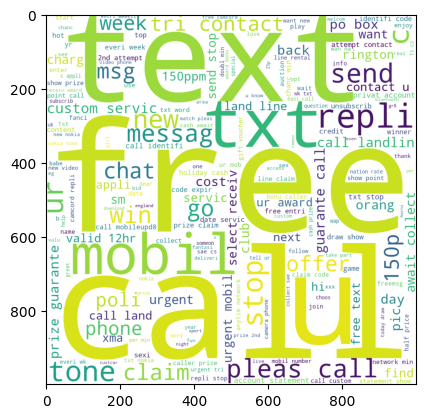

In [53]:
plt.imshow(spam_wc)
plt.show()

In [54]:
ham_wc = wc.generate(df[df['target'] == 'ham']['transforme_text'].str.cat(sep=" "))

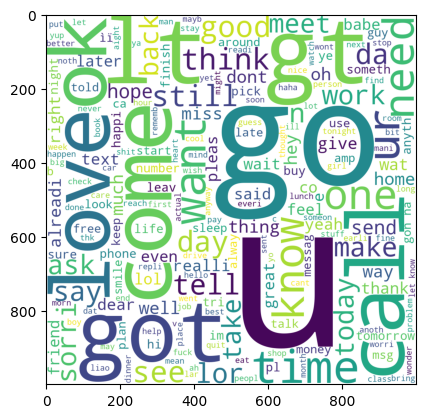

In [55]:
plt.imshow(ham_wc)
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target'] == 'ham']['transforme_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

In [58]:
spam_corpus = []
for msg in df[df['target'] == 'spam']['transforme_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

# model building

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_target,transforme_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think goe usf live around though


In [61]:
# text vectorization
# using bag of words

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from sklearn.pipeline import Pipeline

In [63]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [64]:
x_cv = cv.fit_transform(df['transforme_text']).toarray()


In [65]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [69]:
df['target']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: target, Length: 5169, dtype: object

In [70]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],df['num_target'],test_size=0.2,random_state=2)
# GAUSSIANNB() MODEL 

cv_model = Pipeline([('trans', TextTransformerw()), ('countervector', CountVectorizer()), ('model', MultinomialNB())])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
y_train.shape

(4135,)

In [73]:
y_test.shape

(1034,)

In [74]:
cv_model.fit(x_train,y_train)

Pipeline(steps=[('trans', TextTransformerw()),
                ('countervector', CountVectorizer()),
                ('model', MultinomialNB())])

In [75]:
y_pred = cv_model.predict(x_test)

In [76]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))


accuracy_score 0.9777562862669246
confusion_matrix [[889   7]
 [ 16 122]]


## using tfidf

In [77]:
tf_model = Pipeline([('trans',TextTransformerw()),('tfidf',TfidfVectorizer(max_features=3000)),('model',MultinomialNB())])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],df['num_target'],test_size=0.2,random_state=2)



In [88]:
tf_model.fit(x_train,y_train)
y_pred2 = tf_model.predict(x_test)

In [ ]:
df['text'][2]

In [89]:
print(accuracy_score(y_test,y_pred2))


0.9690522243713733


In [83]:
tf_model.predict(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"])

array([1], dtype=int64)

In [97]:
input_sms = input("Enter the message: ")


# Predict using the classifier
result = tf_model.predict([input_sms])[0]

# Check the result
if result == 1:
    print("The message is spam.")
else:
    print("The message is not spam.")


The message is not spam.


In [94]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_target,transforme_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think goe usf live around though


In [96]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'